<a href="https://colab.research.google.com/github/d122724236/dlib/blob/master/LSTM_CodeTrading_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^TWII', start = '2020-01-01',end = '2022-12-30')
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,12026.500000,12110.740234,12026.230469,12100.480469,12100.480469,2023800
2020-01-03,12167.440430,12197.639648,12023.599609,12110.429688,12110.429688,2572900
2020-01-06,12035.709961,12040.080078,11953.360352,11953.360352,11953.360352,2345200
2020-01-07,11961.969727,11986.030273,11822.400391,11880.320312,11880.320312,2338400
2020-01-08,11818.759766,11899.669922,11777.450195,11817.099609,11817.099609,2428800
2020-01-09,11889.459961,11992.549805,11889.459961,11970.629883,11970.629883,2036900
2020-01-10,12009.269531,12038.209961,11959.059570,12024.650391,12024.650391,1869000
2020-01-13,12069.610352,12113.419922,12037.240234,12113.419922,12113.419922,2292300
2020-01-14,12161.730469,12186.620117,12140.269531,12179.809570,12179.809570,2255300


In [7]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [8]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)
#print(type(data_set))

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,12813.940430,12956.110352,12800.690430,12956.110352,66.749738,12636.673526,11783.247253,11331.765781,-102.820312,0,12872.139648
1,12974.959961,12981.580078,12840.250000,12872.139648,62.916489,12659.098871,11804.809479,11352.168084,-126.200195,0,12778.639648
2,12904.839844,12950.110352,12778.639648,12778.639648,58.882360,12670.483707,11824.093245,11371.061747,-402.110352,0,12362.639648
3,12764.750000,12764.750000,12144.759766,12362.639648,45.097978,12641.165225,11834.757530,11384.195229,145.320312,1,12607.839844
4,12462.519531,12638.650391,12462.519531,12607.839844,52.169284,12637.991380,11850.066091,11400.402443,17.349609,1,12647.129883
5,12629.780273,12702.940430,12567.950195,12647.129883,53.204056,12638.861713,11865.849532,11416.915389,51.849609,1,12758.250000
6,12706.400391,12814.559570,12698.849609,12758.250000,56.083065,12650.232026,11883.520828,11434.681410,64.330078,1,12833.290039
7,12768.959961,12833.290039,12734.690430,12833.290039,57.954678,12667.666123,11902.328140,11453.206028,-91.340820,0,12797.309570
8,12888.650391,12960.679688,12786.450195,12797.309570,56.713015,12680.013118,11920.050544,11471.008724,-30.450195,0,12728.849609
9,12759.299805,12799.160156,12674.570312,12728.849609,54.339647,12684.664212,11936.066367,11487.668868,-171.990234,0,12591.450195


In [9]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.0841671  0.09148526 0.1040869  ... 0.42752371 0.         0.10157077]
 [0.10966193 0.095571   0.11036445 ... 0.40795128 0.         0.08671403]
 [0.09855955 0.09052276 0.10058776 ... 0.17697351 0.         0.02061345]
 ...
 [0.31490059 0.30724451 0.33457963 ... 0.52886854 1.         0.33296889]
 [0.32107406 0.32475067 0.34362317 ... 0.44936478 0.         0.30828762]
 [0.31151698 0.29901835 0.31333153 ... 0.50314339 0.         0.29429208]]


In [11]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 30
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

583
[[[0.0841671  0.09148526 0.1040869  ... 0.00719077 0.         0.        ]
  [0.10966193 0.095571   0.11036445 ... 0.01116849 0.00360692 0.00329751]
  [0.09855955 0.09052276 0.10058776 ... 0.0131879  0.00683269 0.00635118]
  ...
  [0.05920726 0.05054382 0.06399967 ... 0.02368649 0.06557109 0.06789696]
  [0.03247745 0.01630962 0.01898202 ... 0.01582631 0.06586638 0.06899413]
  [0.00484186 0.         0.00080133 ... 0.00818311 0.06605159 0.0700094 ]]

 [[0.10966193 0.095571   0.11036445 ... 0.01116849 0.00360692 0.00329751]
  [0.09855955 0.09052276 0.10058776 ... 0.0131879  0.00683269 0.00635118]
  [0.07637859 0.06078803 0.         ... 0.00798749 0.00861661 0.00847387]
  ...
  [0.03247745 0.01630962 0.01898202 ... 0.01582631 0.06586638 0.06899413]
  [0.00484186 0.         0.00080133 ... 0.00818311 0.06605159 0.0700094 ]
  [0.         0.01234403 0.02183526 ... 0.00515067 0.0669945  0.07150326]]

 [[0.09855955 0.09052276 0.10058776 ... 0.0131879  0.00683269 0.00635118]
  [0.07637859 0.06

In [ ]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [12]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

442
(442, 30, 8)
(111, 30, 8)
(442, 1)
(111, 1)
[[0.03731192]
 [0.04491982]
 [0.05011093]
 [0.07489074]
 [0.08158654]
 [0.10396227]
 [0.11488154]
 [0.11348639]
 [0.10906586]
 [0.09452862]
 [0.08222212]
 [0.10732282]
 [0.10001843]
 [0.10238278]
 [0.10870369]
 [0.10581021]
 [0.10743253]
 [0.10202682]
 [0.089115  ]
 [0.06832512]
 [0.04980261]
 [0.0569481 ]
 [0.07994033]
 [0.10089717]
 [0.10898486]
 [0.1176813 ]
 [0.1421416 ]
 [0.13487213]
 [0.16354813]
 [0.15712714]
 [0.16531817]
 [0.20957061]
 [0.21611388]
 [0.24475963]
 [0.23667814]
 [0.23572647]
 [0.26139913]
 [0.25013663]
 [0.23928409]
 [0.25625892]
 [0.259664  ]
 [0.23675122]
 [0.2626163 ]
 [0.27905718]
 [0.27714252]
 [0.30182705]
 [0.3215554 ]
 [0.33804889]
 [0.34277433]
 [0.32042575]
 [0.32236431]
 [0.31431774]
 [0.2916703 ]
 [0.3291602 ]
 [0.32192564]
 [0.32050039]
 [0.3419513 ]
 [0.30898046]
 [0.31623085]
 [0.32531816]
 [0.33344402]
 [0.35754061]
 [0.3557895 ]
 [0.3900554 ]
 [0.3971787 ]
 [0.42411151]
 [0.43968328]
 [0.43699788]


In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
27/27 [==============================] - 4s 50ms/step - loss: 0.0513 - val_loss: 0.0304
Epoch 2/30
27/27 [==============================] - 1s 32ms/step - loss: 0.0039 - val_loss: 0.0136
Epoch 3/30
27/27 [==============================] - 1s 32ms/step - loss: 0.0030 - val_loss: 0.0118
Epoch 4/30
27/27 [==============================] - 1s 33ms/step - loss: 0.0028 - val_loss: 0.0149
Epoch 5/30
27/27 [==============================] - 1s 32ms/step - loss: 0.0025 - val_loss: 0.0116
Epoch 6/30
27/27 [==============================] - 1s 45ms/step - loss: 0.0023 - val_loss: 0.0116
Epoch 7/30
27/27 [==============================] - 2s 58ms/step - loss: 0.0023 - val_loss: 0.0097
Epoch 8/30
27/27 [==============================] - 1s 44ms/step - loss: 0.0022 - val_loss: 0.0083
Epoch 9/30
27/27 [==============================] - 1s 31ms/step - loss: 0.0021 - val_loss: 0.0083
Epoch 10/30
27/27 [==============================] - 1s 32ms/step - loss: 0.0022 - val_loss: 0.0069
Epoch 11/

In [14]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

4/4 [==============================] - 0s 13ms/step
[0.46443143] [0.4089767]
[0.4671523] [0.42721944]
[0.4593249] [0.42250192]
[0.46058375] [0.43968964]
[0.46172893] [0.43676916]
[0.46971846] [0.3995145]
[0.47215596] [0.40424785]
[0.4551901] [0.39235939]
[0.44768026] [0.44540508]
[0.4375684] [0.44292156]


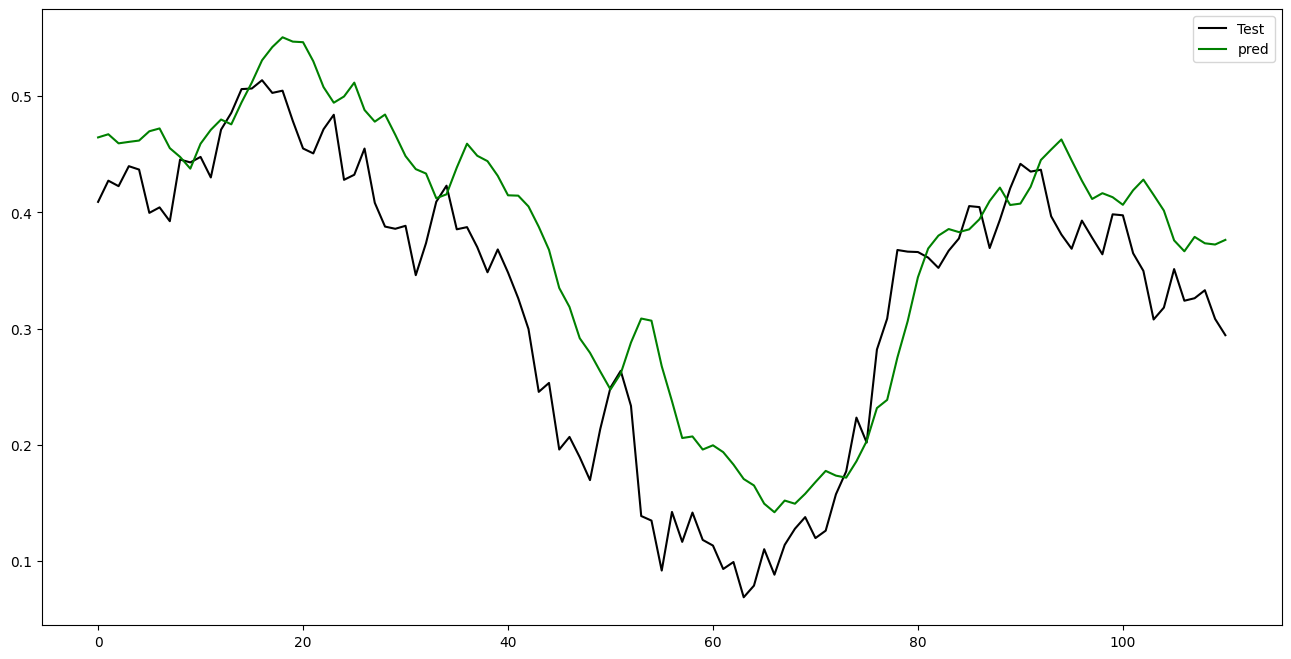

In [15]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()